In [140]:
import pandas as pd
import numpy as np

from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns
import json

from bs4 import BeautifulSoup

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel

# CREATING COMBINED CSV FILE

In [74]:
batman_vol1 = pd.read_csv("data/batman_vol1.csv")
batman_vol2 = pd.read_csv("data/batman_vol2.csv")
batman_vol3 = pd.read_csv("data/batman_vol3.csv")
batman_and_robin = pd.read_csv("data/batman_and_robin.csv")
young_justice = pd.read_csv("data/young_justice.csv")
we_are_robin = pd.read_csv("data/we_are_robin.csv")
gotham_academy = pd.read_csv("data/gotham_academy.csv")
super_sons = pd.read_csv("data/super_sons.csv")
red_robin = pd.read_csv("data/red_robin.csv")
robin1993_2009 = pd.read_csv("data/robin1993_2009.csv")
hellblazer = pd.read_csv("data/hellblazer.csv")
JLA = pd.read_csv("data/JLA.csv")
justice_league_dark = pd.read_csv("data/justice_league_dark.csv")

In [75]:
combined = pd.concat([batman_vol1, batman_vol2, batman_vol3, batman_and_robin, young_justice, 
                      we_are_robin, gotham_academy, super_sons, red_robin, robin1993_2009, 
                      hellblazer, JLA, justice_league_dark
                     ], ignore_index=True)

In [76]:
combined.to_csv("data/combined.csv", index=False)

# LOADING CSV FILES

In [77]:
combined = pd.read_csv("data/combined.csv")

In [78]:
combined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1903 entries, 0 to 1902
Data columns (total 32 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Unnamed: 0                   1903 non-null   int64  
 1   aliases                      0 non-null      float64
 2   api_detail_url               1903 non-null   object 
 3   associated_images            1903 non-null   object 
 4   character_credits            1903 non-null   object 
 5   character_died_in            1903 non-null   object 
 6   concept_credits              1903 non-null   object 
 7   cover_date                   1903 non-null   object 
 8   date_added                   1903 non-null   object 
 9   date_last_updated            1903 non-null   object 
 10  deck                         85 non-null     object 
 11  description                  1877 non-null   object 
 12  first_appearance_characters  0 non-null      float64
 13  first_appearance_c

# PREPROCESSING

In [97]:
def clean_data(input_dataframe):
    df = input_dataframe.copy()
    df.drop(columns=["Unnamed: 0", "aliases", "deck", "first_appearance_characters", "first_appearance_concepts", 
                    "first_appearance_locations", "first_appearance_objects", "first_appearance_storyarcs",
                    "first_appearance_teams", "store_date"], inplace=True)
    df.dropna(subset=['name'], inplace=True)
    df['cover_date'] = pd.to_datetime(df['cover_date'], errors='coerce')
    df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')
    df['date_last_updated'] = pd.to_datetime(df['date_last_updated'], errors='coerce')
    df['description'] = df['description'].fillna('')
    df = df.reset_index()
    return df

In [130]:
clean_combined = clean_data(combined)

In [131]:
clean_combined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1900 entries, 0 to 1899
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   index              1900 non-null   int64         
 1   api_detail_url     1900 non-null   object        
 2   associated_images  1900 non-null   object        
 3   character_credits  1900 non-null   object        
 4   character_died_in  1900 non-null   object        
 5   concept_credits    1900 non-null   object        
 6   cover_date         1900 non-null   datetime64[ns]
 7   date_added         1900 non-null   datetime64[ns]
 8   date_last_updated  1900 non-null   datetime64[ns]
 9   description        1900 non-null   object        
 10  has_staff_review   1900 non-null   object        
 11  id                 1900 non-null   int64         
 12  image              1900 non-null   object        
 13  issue_number       1900 non-null   object        
 14  location

In [132]:
def clean_description(html_text):
    soup = BeautifulSoup(html_text, 'html.parser')
    cleaned_text = soup.get_text(separator='\n')
    return cleaned_text

In [133]:
def get_names(json_str, index):
    json_str = json_str.replace("'",'"')
    try:
        lst = json.loads(json_str)
    except json.JSONDecodeError as e:
        print(f"JSONDecodeError at row {index}: {e}")
        return []
    names = [item["name"] for item in lst]
    return names

In [134]:
clean_combined["description"] = clean_combined["description"].apply(clean_description)

In [135]:
clean_combined['character_credits'] = clean_combined.apply(lambda row: get_names(row['character_credits'], row.name), axis=1)

JSONDecodeError at row 25: Expecting ',' delimiter: line 1 column 676 (char 675)
JSONDecodeError at row 62: Expecting ',' delimiter: line 1 column 476 (char 475)
JSONDecodeError at row 140: Expecting ',' delimiter: line 1 column 1061 (char 1060)
JSONDecodeError at row 143: Expecting ',' delimiter: line 1 column 1652 (char 1651)
JSONDecodeError at row 148: Expecting ',' delimiter: line 1 column 2626 (char 2625)
JSONDecodeError at row 151: Expecting ',' delimiter: line 1 column 1058 (char 1057)
JSONDecodeError at row 152: Expecting ',' delimiter: line 1 column 1058 (char 1057)
JSONDecodeError at row 165: Expecting ',' delimiter: line 1 column 2017 (char 2016)
JSONDecodeError at row 196: Expecting ',' delimiter: line 1 column 2204 (char 2203)
JSONDecodeError at row 197: Expecting ',' delimiter: line 1 column 2412 (char 2411)
JSONDecodeError at row 198: Expecting ',' delimiter: line 1 column 2364 (char 2363)
JSONDecodeError at row 240: Expecting ',' delimiter: line 1 column 857 (char 856)


In [143]:
clean_combined['location_credits'] = clean_combined.apply(lambda row: get_names(row['location_credits'], row.name), axis=1)

JSONDecodeError at row 54: Expecting ',' delimiter: line 1 column 107 (char 106)
JSONDecodeError at row 263: Expecting ',' delimiter: line 1 column 890 (char 889)
JSONDecodeError at row 264: Expecting ',' delimiter: line 1 column 904 (char 903)
JSONDecodeError at row 288: Expecting ',' delimiter: line 1 column 666 (char 665)
JSONDecodeError at row 312: Expecting ',' delimiter: line 1 column 1112 (char 1111)
JSONDecodeError at row 313: Expecting ',' delimiter: line 1 column 494 (char 493)
JSONDecodeError at row 345: Expecting ',' delimiter: line 1 column 483 (char 482)
JSONDecodeError at row 379: Expecting ',' delimiter: line 1 column 506 (char 505)
JSONDecodeError at row 457: Expecting ',' delimiter: line 1 column 688 (char 687)
JSONDecodeError at row 903: Expecting ',' delimiter: line 1 column 114 (char 113)
JSONDecodeError at row 908: Expecting ',' delimiter: line 1 column 298 (char 297)
JSONDecodeError at row 909: Expecting ',' delimiter: line 1 column 486 (char 485)
JSONDecodeError

In [152]:
clean_combined['person_credits'] = clean_combined.apply(lambda row: get_names(row['person_credits'], row.name), axis=1)

JSONDecodeError at row 132: Expecting ',' delimiter: line 1 column 109 (char 108)
JSONDecodeError at row 133: Expecting ',' delimiter: line 1 column 109 (char 108)
JSONDecodeError at row 135: Expecting ',' delimiter: line 1 column 109 (char 108)
JSONDecodeError at row 140: Expecting ',' delimiter: line 1 column 326 (char 325)
JSONDecodeError at row 142: Expecting ',' delimiter: line 1 column 326 (char 325)
JSONDecodeError at row 143: Expecting ',' delimiter: line 1 column 326 (char 325)
JSONDecodeError at row 145: Expecting ',' delimiter: line 1 column 543 (char 542)
JSONDecodeError at row 147: Expecting ',' delimiter: line 1 column 109 (char 108)
JSONDecodeError at row 148: Expecting ',' delimiter: line 1 column 109 (char 108)
JSONDecodeError at row 149: Expecting ',' delimiter: line 1 column 534 (char 533)
JSONDecodeError at row 150: Expecting ',' delimiter: line 1 column 738 (char 737)
JSONDecodeError at row 151: Expecting ',' delimiter: line 1 column 109 (char 108)
JSONDecodeError 

In [178]:
combined["person_credits"][0]

"[{'api_detail_url': 'https://comicvine.gamespot.com/api/person/4040-46732/', 'id': 46732, 'name': 'Alvin Schwartz', 'site_detail_url': 'https://comicvine.gamespot.com/alvin-schwartz/4040-46732/', 'role': 'writer'}, {'api_detail_url': 'https://comicvine.gamespot.com/api/person/4040-43591/', 'id': 43591, 'name': 'Bill Finger', 'site_detail_url': 'https://comicvine.gamespot.com/bill-finger/4040-43591/', 'role': 'writer'}, {'api_detail_url': 'https://comicvine.gamespot.com/api/person/4040-19137/', 'id': 19137, 'name': 'Bob Kane', 'site_detail_url': 'https://comicvine.gamespot.com/bob-kane/4040-19137/', 'role': 'penciler'}, {'api_detail_url': 'https://comicvine.gamespot.com/api/person/4040-38494/', 'id': 38494, 'name': 'Charles Paris', 'site_detail_url': 'https://comicvine.gamespot.com/charles-paris/4040-38494/', 'role': 'inker'}, {'api_detail_url': 'https://comicvine.gamespot.com/api/person/4040-47799/', 'id': 47799, 'name': 'Dick Sprang', 'site_detail_url': 'https://comicvine.gamespot.co

# EDA

In [155]:
df = clean_combined.copy()

count    1900.000000
mean        7.576842
std         5.932825
min         0.000000
25%         4.000000
50%         6.000000
75%        10.000000
max        75.000000
Name: num_characters, dtype: float64


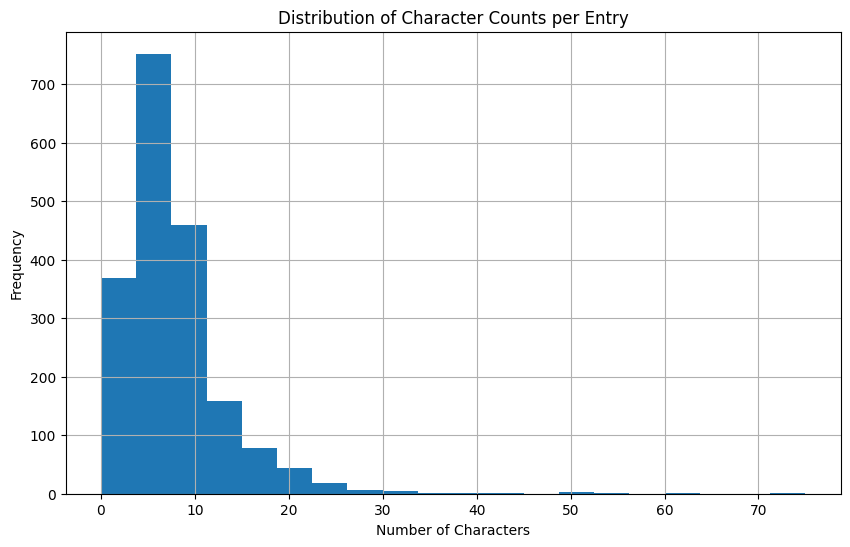

In [146]:
# Calculate the number of characters in each entry
df['num_characters'] = df['character_credits'].apply(len)

# Summary statistics for number of characters per entry
print(df['num_characters'].describe())

# Plot the distribution of character counts
plt.figure(figsize=(10, 6))
df['num_characters'].hist(bins=20)
plt.title('Distribution of Character Counts per Entry')
plt.xlabel('Number of Characters')
plt.ylabel('Frequency')
plt.show()

              Character  Count
1                Batman    992
767    John Constantine    632
0     Alfred Pennyworth    577
4          James Gordon    529
3          Dick Grayson    488
748           Tim Drake    380
6                 Joker    217
41             Catwoman    188
1758      Chas Chandler    158
194      Barbara Gordon    143


<Figure size 1200x800 with 0 Axes>

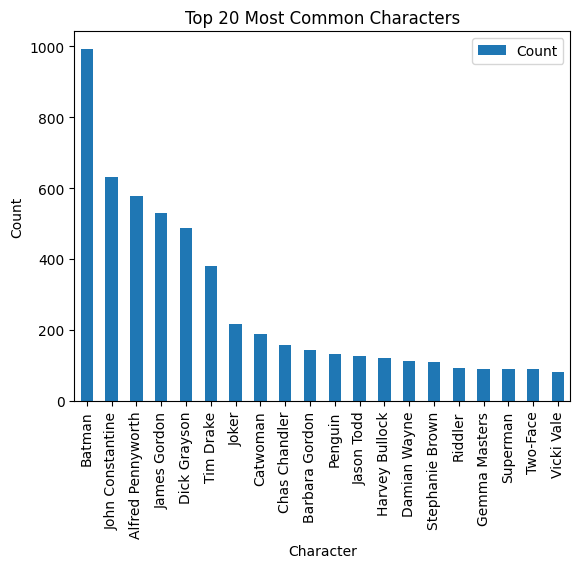

In [147]:
# Flatten the list of all characters
all_characters = [character for sublist in df['character_credits'] for character in sublist]

# Count the occurrences of each character
character_counts = Counter(all_characters)

# Convert to a DataFrame for easier analysis
character_counts_df = pd.DataFrame(character_counts.items(), columns=['Character', 'Count'])

# Sort by count in descending order
character_counts_df = character_counts_df.sort_values(by='Count', ascending=False)

# Display the most common characters
print(character_counts_df.head(10))

# Plot the most common characters
plt.figure(figsize=(12, 8))
character_counts_df.head(20).set_index('Character').plot(kind='bar')
plt.title('Top 20 Most Common Characters')
plt.xlabel('Character')
plt.ylabel('Count')
plt.show()


count    1900.000000
mean        1.868421
std         1.748407
min         0.000000
25%         1.000000
50%         1.000000
75%         3.000000
max        14.000000
Name: num_locations, dtype: float64


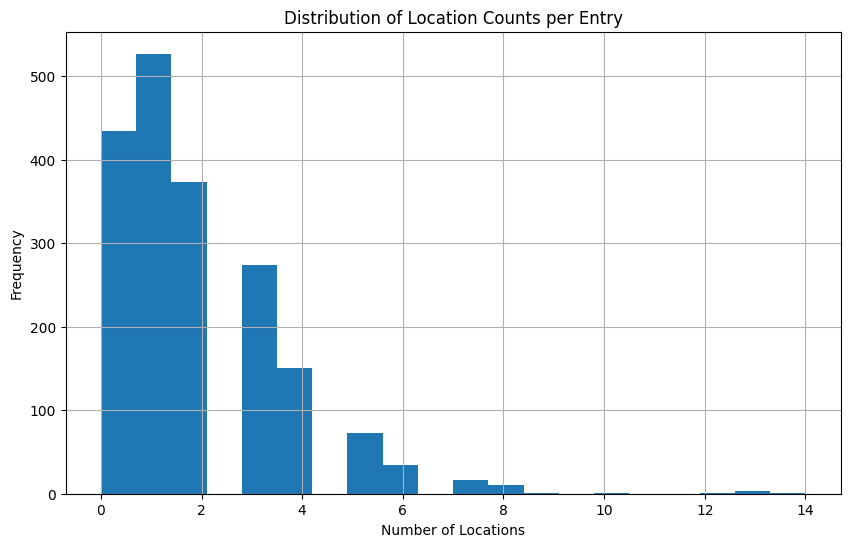

In [148]:
# Calculate the number of locations in each entry
df['num_locations'] = df['location_credits'].apply(len)

# Summary statistics for number of locations per entry
print(df['num_locations'].describe())

# Plot the distribution of location counts
plt.figure(figsize=(10, 6))
df['num_locations'].hist(bins=20)
plt.title('Distribution of Location Counts per Entry')
plt.xlabel('Number of Locations')
plt.ylabel('Frequency')
plt.show()


                      Location  Count
1                  Gotham City    962
0                      Batcave    407
9                  Wayne Manor    286
163                     London    191
8            GCPD Headquarters    128
52               Arkham Asylum     78
39                     England     75
146                       Hell     71
2    Gotham State Penitentiary     48
44                   Batbunker     34


<Figure size 1200x800 with 0 Axes>

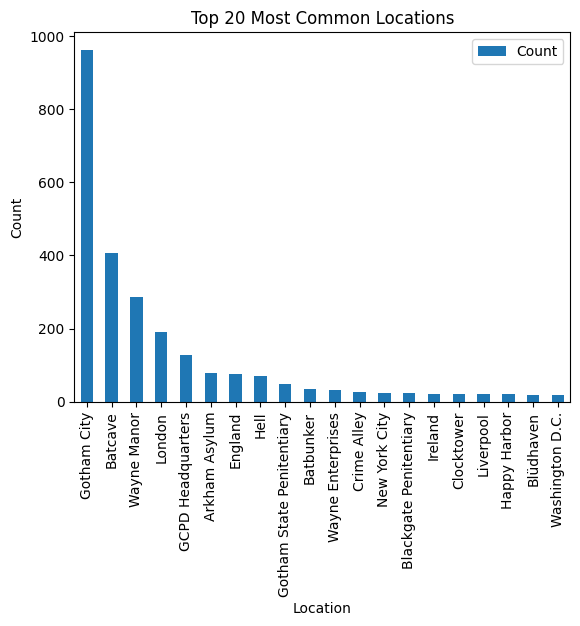

In [149]:
# Flatten the list of all locations
all_locations = [location for sublist in df['location_credits'] for location in sublist]

# Count the occurrences of each location
location_counts = Counter(all_locations)

# Convert to a DataFrame for easier analysis
location_counts_df = pd.DataFrame(location_counts.items(), columns=['Location', 'Count'])

# Sort by count in descending order
location_counts_df = location_counts_df.sort_values(by='Count', ascending=False)

# Display the most common locations
print(location_counts_df.head(10))

# Plot the most common locations
plt.figure(figsize=(12, 8))
location_counts_df.head(20).set_index('Location').plot(kind='bar')
plt.title('Top 20 Most Common Locations')
plt.xlabel('Location')
plt.ylabel('Count')
plt.show()

count    1900.000000
mean        6.349474
std         3.808056
min         0.000000
25%         5.000000
50%         7.000000
75%         8.000000
max        65.000000
Name: num_persons, dtype: float64


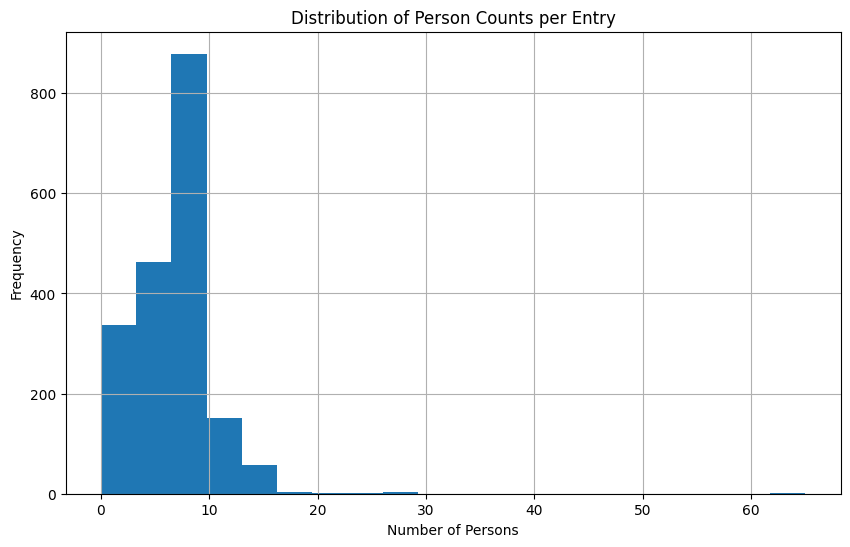

In [157]:
# Calculate the number of persons in each entry
df['num_persons'] = df['person_credits'].apply(len)

# Summary statistics for number of persons per entry
print(df['num_persons'].describe())

# Plot the distribution of person counts
plt.figure(figsize=(10, 6))
df['num_persons'].hist(bins=20)
plt.title('Distribution of Person Counts per Entry')
plt.xlabel('Number of Persons')
plt.ylabel('Frequency')
plt.show()


                Person  Count
178        Clem Robins    205
405     Lee Loughridge    178
779     Tim Bradstreet    160
1          Bill Finger    159
200  Jared K. Fletcher    155
763        Axel Alonso    148
243         Mike Marts    143
306       Sal Cipriano    138
592  Digital Chameleon    133
3        Charles Paris    131


<Figure size 1200x800 with 0 Axes>

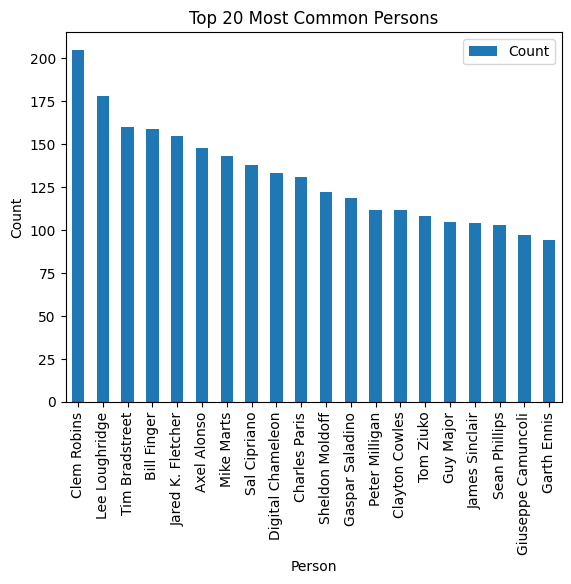

In [158]:
# Flatten the list of all persons
all_persons = [person for sublist in df['person_credits'] for person in sublist]

# Count the occurrences of each person
person_counts = Counter(all_persons)

# Convert to a DataFrame for easier analysis
person_counts_df = pd.DataFrame(person_counts.items(), columns=['Person', 'Count'])

# Sort by count in descending order
person_counts_df = person_counts_df.sort_values(by='Count', ascending=False)

# Display the most common persons
print(person_counts_df.head(10))

# Plot the most common persons
plt.figure(figsize=(12, 8))
person_counts_df.head(20).set_index('Person').plot(kind='bar')
plt.title('Top 20 Most Common Persons')
plt.xlabel('Person')
plt.ylabel('Count')
plt.show()


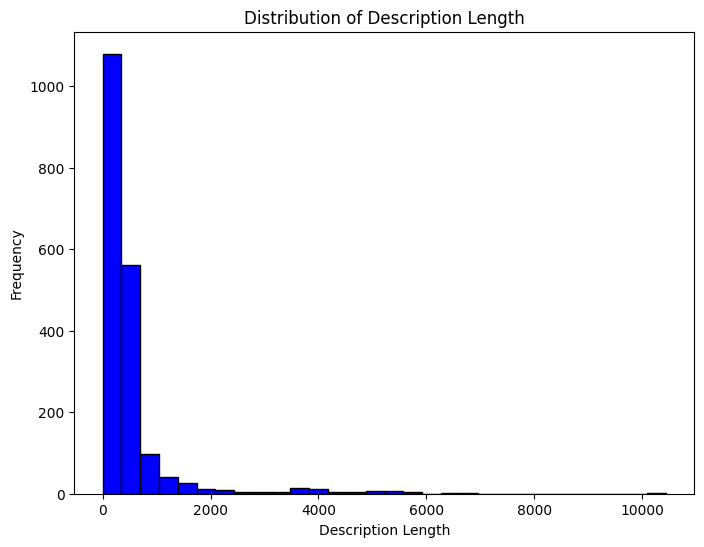

In [187]:
df['description_length'] = df['description'].apply(lambda x: len(str(x)))
plt.figure(figsize=(8, 6))
plt.hist(df['description_length'], bins=30, color='blue', edgecolor='black')
plt.title('Distribution of Description Length')
plt.xlabel('Description Length')
plt.ylabel('Frequency')
plt.show()

In [191]:
df["description_length"].value_counts().sort_index().head(100)

description_length
0      37
1       2
2       3
25      1
33      1
       ..
158     2
160     4
161     4
162     3
163     3
Name: count, Length: 100, dtype: int64

# BASIC CONTENT-BASED RECOMMENDATION MODEL

In [159]:
tfidf = TfidfVectorizer(stop_words='english')

In [160]:
tfidf_matrix = tfidf.fit_transform(clean_combined['description'])

In [161]:
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)

In [162]:
def get_recommendations(df, title, cosine_sim=cosine_sim):
    # Get the index of the issue that matches the title
    idx = df[df['name'] == title].index[0]
    # Get the pairwise similarity scores of all issues with that issue
    sim_scores = list(enumerate(cosine_sim[idx]))
    # Sort the issues based on the similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    # Get the scores of the 10 most similar issues
    sim_scores = sim_scores[1:11]
    # Get the issue indices
    issue_indices = [i[0] for i in sim_scores]
    # Return the top 10 most similar issues
    return df[['name', 'issue_number', 'description']].iloc[issue_indices]

In [163]:
recommendations = get_recommendations(clean_combined, "Welcome to Gotham Academy")
recommendations

name issue_number  \
1025  Yearbook Part One; Animal Science 101; Queen G...           14   
1016                           The Secret of the Symbol            4   
1029  Yearbook Part Five; Whatever Happened to Profe...           18   
1017                                Save The Last Dance            5   
1023                                    Mission: Gotham           11   
1021                                           Calamity            9   
723                     Attack on Wayne Manor; The Call          8.0   
1014                 The Diary of Millie Jane Cobblepot            2   
1024                      Robins vs. Zombies: Robin War           13   
253                                         Shadow Play          348   

                                            description  
1025  An all-new era of GOTHAM ACADEMY begins here w...  
1016   The hunt for the Ghost of Gotham Academy begins!  
1029  As the “Gotham Academy Yearbook” storyline com...  
1017  This month’s assignment: Uncover the hideous s...  
1023  The gang is going downtown! Olive and Maps use...  
1021  If the gang thought it was hard to keep up wit...  
723   Broken and beaten, Bruce Wayne has retreated f...  
1014  Olive joins the creepy Order of the Bat as an ...  
1024  A “Robin War” tie-in! With Robins fighting cop...  
253   “SHADOW PLAY!” Batman and Robin return to Wayn...

Among the recommneded issues, most come from within the same series: Gotham Academy. 

In [164]:
gotham_academy["name"]

0                             Welcome to Gotham Academy
1                    The Diary of Millie Jane Cobblepot
2                           The Ghost in the North Hall
3                              The Secret of the Symbol
4                                   Save The Last Dance
5                                            Pizza Club
6                          Curse of the Inishtree Quill
7                                               Requiem
8                                              Calamity
9                                       The Cursed Play
10                                      Mission: Gotham
11                                                  NaN
12                        Robins vs. Zombies: Robin War
13    Yearbook Part One; Animal Science 101; Queen G...
14    Yearbook Part Two; Staff Party; Serpents & Sec...
15    Yearbook Part Three; Maps' Day Out; Boring Sun...
16    Yearbook Part Four; This One's For You; A Fami...
17    Yearbook Part Five; Whatever Happened to P

In [192]:
feature_names = tfidf.get_feature_names_out()

In [193]:
df_tfidf = pd.DataFrame(tfidf_matrix.toarray(), columns=feature_names)

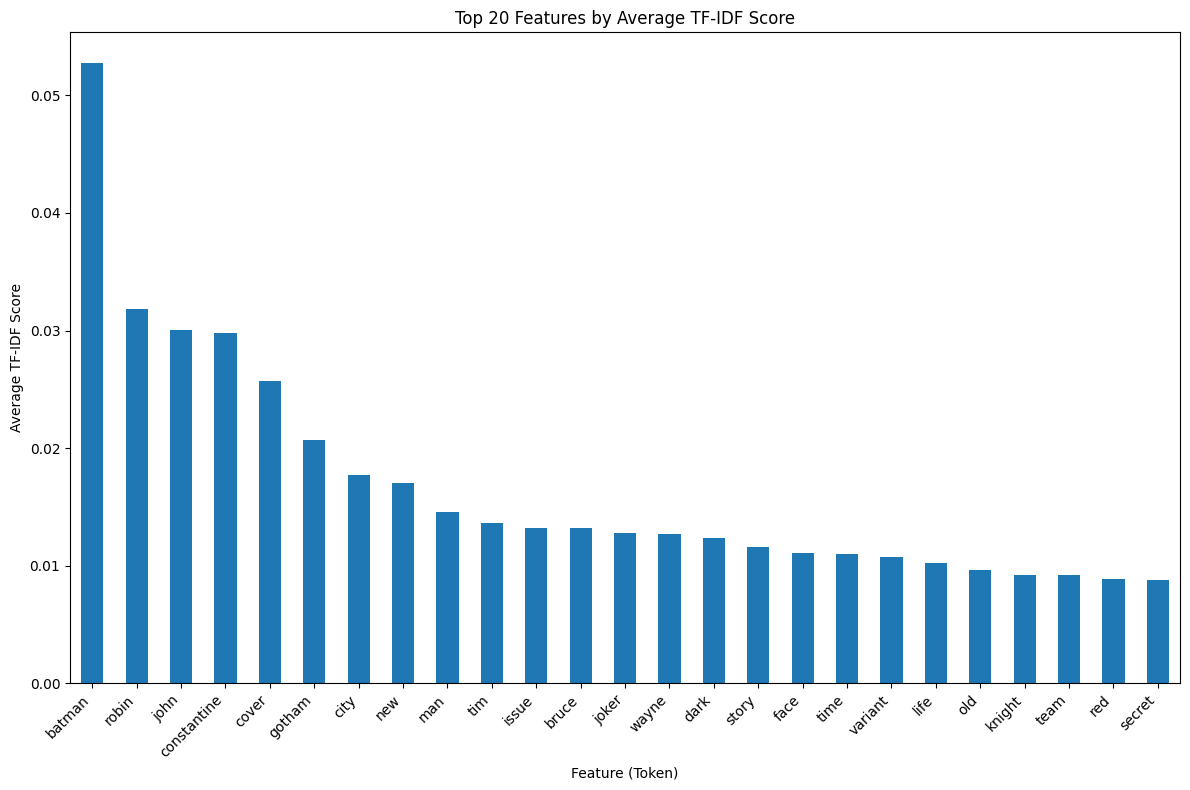

In [205]:
avg_tfidf_scores = df_tfidf.mean().sort_values(ascending=False).head(25)

plt.figure(figsize=(12, 8))
avg_tfidf_scores.plot(kind='bar')
plt.title('Top 20 Features by Average TF-IDF Score')
plt.xlabel('Feature (Token)')
plt.ylabel('Average TF-IDF Score')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()